# Test Code for Project 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense

C:\Users\TRANNGUYEN.DESKTOP-M0N940V\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
%run -i ANN_Nguyen.py
%run -i viztools.py

In [8]:
np.set_printoptions(suppress=True, precision=5)

# Generate Data

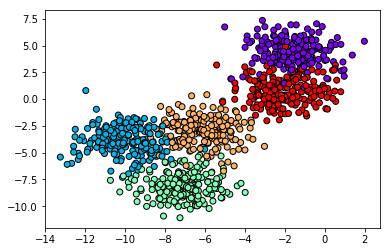

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=5, cluster_std=1.2, random_state=1)

plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='rainbow')
plt.show()

## Test 01 
2 inputs, 3 hidden layers, 5 classes, untrained weights, sigmoid activation.

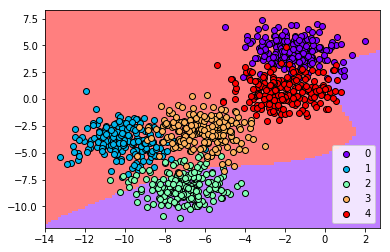

In [20]:
np.random.seed(142)
model_1 = ANN(X, y, layer_sizes=[2, 8, 16, 8, 5], activation='sigmoid')

plot_regions(model_1, X, y)

In [21]:
print(model_1.score(X, y))

(2078.5928623221444, 0.2)


In [12]:
print(model_1.predict_proba(X[:5,:]))

[[0.41085 0.09229 0.03793 0.05144 0.40749]
 [0.38768 0.09232 0.04488 0.05374 0.42137]
 [0.39273 0.09336 0.04344 0.05304 0.41744]
 [0.39279 0.09371 0.04303 0.0527  0.41777]
 [0.39082 0.09755 0.04756 0.05297 0.41111]]


In [13]:
print(model_1.predict(X[:5,:]))

[0 4 4 4 4]


In [14]:
print(model_1.T[:5,:])

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Test 02 
2 inputs, 3 hidden layers, 5 classes, trained weights, sigmoid activation.

In [22]:
model_2_temp = load_model('model_2_weights.h5')
temp_wts = model_2_temp.get_weights()

wts = []
for i in range(int(len(temp_wts) / 2)):
    W = np.vstack([temp_wts[2*i + 1].reshape(1,-1), temp_wts[2*i] ])
    wts.append(W)

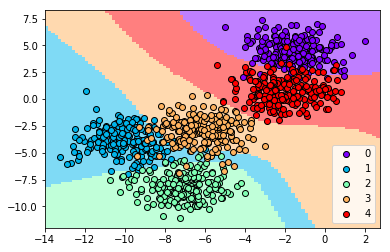

In [23]:
model_2 = ANN(X, y, layer_sizes=[2, 8, 16, 8, 5], activation='sigmoid', weights=wts)

plot_regions(model_2, X, y)

In [24]:
print(model_2.score(X, y))

(304.98502346476226, 0.921)


In [25]:
print(model_2.predict_proba(X[:5,:]))

[[0.00002 0.09788 0.89061 0.01143 0.00006]
 [0.0002  0.63134 0.27896 0.08863 0.00087]
 [0.00326 0.11898 0.00423 0.84065 0.03288]
 [0.00442 0.08193 0.00245 0.85493 0.05626]
 [0.08765 0.00344 0.00003 0.03998 0.86889]]


In [26]:
print(model_2.predict(X[:5,:]))

[2 1 3 3 4]


## Test 03
2 inputs, 3 hidden layers, 5 classes, untrained weights, relu activation.

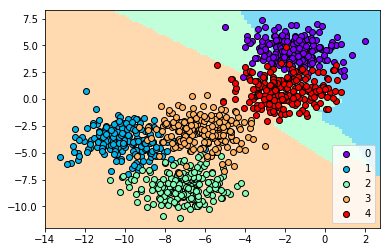

In [27]:
np.random.seed(81)
model_3 = ANN(X, y, layer_sizes=[2, 8, 16, 8, 5], activation='relu')

plot_regions(model_3, X, y)

In [28]:
print(model_3.score(X, y))

(6366.656339252345, 0.2)


In [30]:
print(model_3.predict_proba(X[:5,:]))

[[0.00004 0.00001 0.18738 0.81258 0.     ]
 [0.      0.      0.09943 0.90056 0.     ]
 [0.00047 0.00012 0.29467 0.70474 0.00001]
 [0.00084 0.00023 0.3181  0.68081 0.00002]
 [0.00818 0.25804 0.62451 0.10637 0.00289]]


In [31]:
print(model_3.predict(X[:5,:]))

[3 3 3 3 2]


## Test 04
2 inputs, 3 hidden layers, 5 classes, trained weights, relu activation.

In [32]:
model_4_temp = load_model('model_4_weights.h5')
temp_wts = model_4_temp.get_weights()

wts = []
for i in range(int(len(temp_wts) / 2)):
    W = np.vstack([temp_wts[2*i + 1].reshape(1,-1), temp_wts[2*i] ])
    wts.append(W)

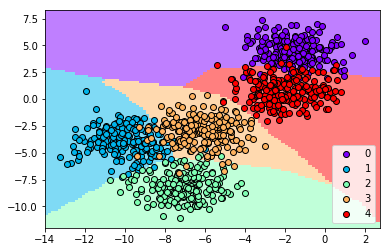

In [33]:
model_4 = ANN(X, y, layer_sizes=[2, 8, 16, 8, 5], activation='relu', weights=wts)

plot_regions(model_4, X, y)

In [34]:
print(model_4.score(X, y))

(143.12755737150763, 0.946)


In [35]:
print(model_4.predict_proba(X[:5,:]))

[[0.      0.00048 0.99849 0.00103 0.     ]
 [0.      0.99991 0.00009 0.      0.     ]
 [0.00013 0.00174 0.00046 0.99764 0.00004]
 [0.00019 0.00015 0.00016 0.99901 0.00049]
 [0.04185 0.      0.      0.      0.95815]]


In [37]:
print(model_4.predict(X[:5,:]))

[2 1 3 3 4]


## Test 05
16 inputs, 6 hidden layers, 32 classes, untrained weights, sigmoid activation.

In [38]:
np.random.seed(1)
X = list(np.random.uniform(-2, 2, size=(2000, 16)))
y = list(np.random.choice(range(32), 2000))

In [40]:
%run -i ANN_Nguyen.py
np.random.seed(1)
layer_sizes = [16, 32, 64, 128, 256, 128, 64, 32]
model_5 = ANN(X, y, layer_sizes=layer_sizes, activation='sigmoid')

print(model_5.score(X,y))

(13668.146598810868, 0.023)


In [41]:
X_new = list(np.random.uniform(-2, 2, size=(5, 16)))

print(model_5.predict_proba(X_new))

[[0.00004 0.00001 0.00229 0.58673 0.00253 0.10287 0.00057 0.00029 0.00001
  0.02167 0.00002 0.01175 0.00017 0.0004  0.00544 0.00057 0.10756 0.00071
  0.00031 0.00122 0.0524  0.00558 0.00446 0.00015 0.00007 0.01097 0.03298
  0.00221 0.00001 0.00849 0.00024 0.03727]
 [0.00004 0.00001 0.00299 0.67959 0.00178 0.07462 0.00061 0.00016 0.00002
  0.0162  0.00002 0.01136 0.00019 0.00042 0.00424 0.00041 0.0581  0.00098
  0.00026 0.00135 0.04998 0.00498 0.00594 0.00007 0.00007 0.00815 0.02049
  0.00224 0.00001 0.00607 0.00014 0.04849]
 [0.00005 0.00001 0.00258 0.6793  0.00239 0.05979 0.0005  0.00021 0.00001
  0.01992 0.00002 0.00971 0.00022 0.00047 0.00499 0.00034 0.06811 0.00087
  0.00026 0.00116 0.05433 0.00363 0.00488 0.00007 0.00007 0.01649 0.02363
  0.00239 0.00001 0.00796 0.00012 0.0355 ]
 [0.00006 0.      0.00232 0.67543 0.00218 0.07485 0.00063 0.00011 0.00001
  0.01183 0.00001 0.0049  0.0002  0.00044 0.00337 0.00032 0.07714 0.00066
  0.00017 0.00099 0.0651  0.00281 0.00228 0.00007 0.00003

In [ ]:
print(model_5.predict(X_new))